In [1]:
#https://openwetware.org/wiki/Imperial_College/Courses/2010/Synthetic_Biology/Computer_Modelling_Practicals/Practical_1
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
k1=10**8
k2=100
k3=1/10

In [3]:
s0=[10**(-7),10**-5, 0, 0]#[E],[S],[ES],[P]
def f(s,t,k1,k2,k3):
    
    E = s[0]
    S = s[1]
    ES = s[2]
    P = s[3]
    dEdt = k2*ES - k1*E*S +k3*ES
    dSdt = k2*ES - k1*E*S
    dESdt = k1*E*S - k2*ES - k3*ES
    dPdt = k3*ES
    return [dEdt,dSdt,dESdt,dPdt]

In [4]:
t = np.linspace(0,10000)

s = odeint(f,s0,t, args=tuple((k1,k2,k3)) )

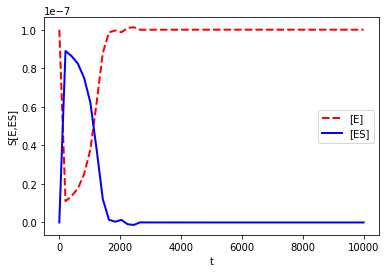

In [5]:
plt.plot(t,s[:,0],'r--', linewidth=2.0)
plt.plot(t,s[:,2],'b-', linewidth=2.0)

plt.xlabel("t")
plt.ylabel("S[E,ES]")
plt.legend(["[E]","[ES]"])
plt.show()


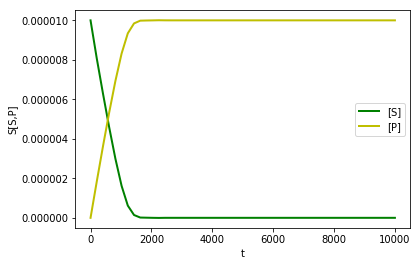

In [6]:
plt.plot(t,s[:,1],'g-', linewidth=2.0)
plt.plot(t,s[:,3],'y-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("S[S,P]")
plt.legend(["[S]","[P]"])
plt.show()

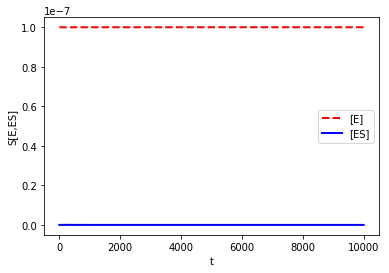

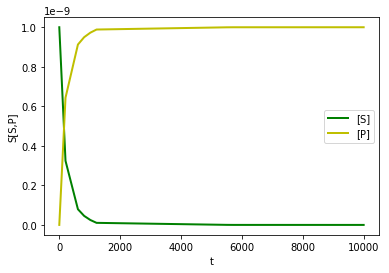

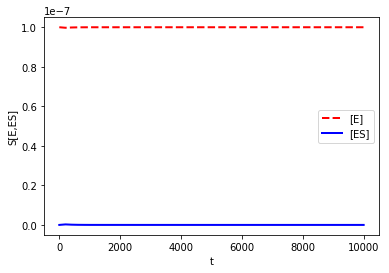

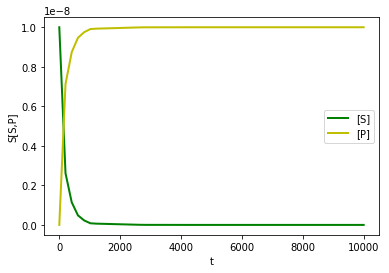

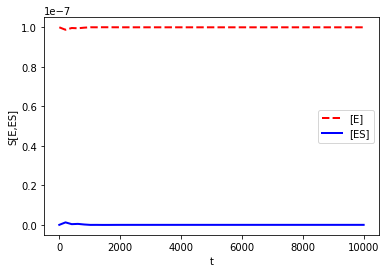

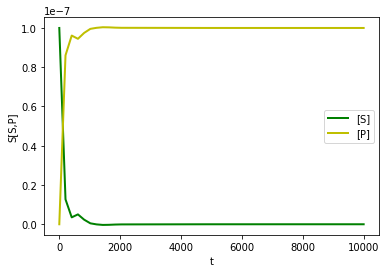

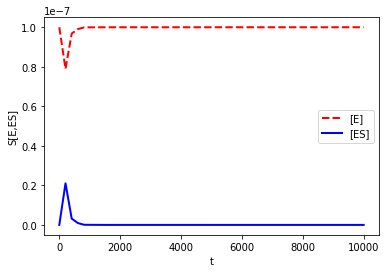

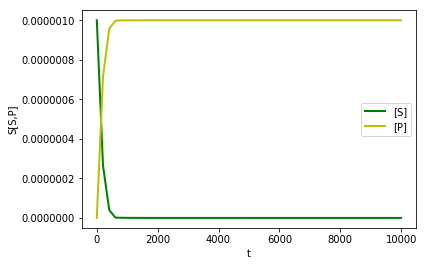

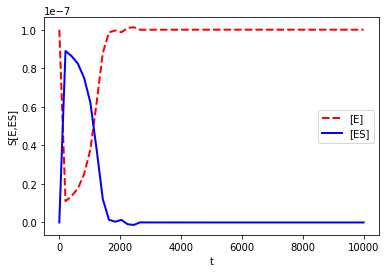

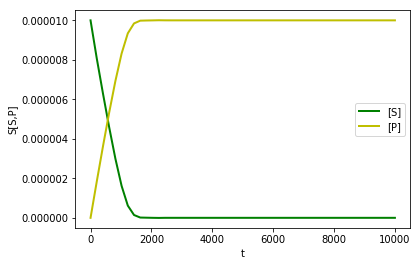

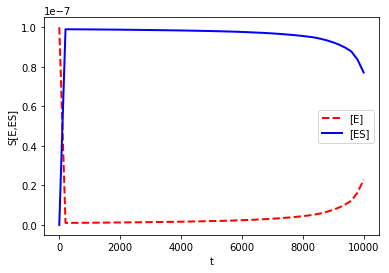

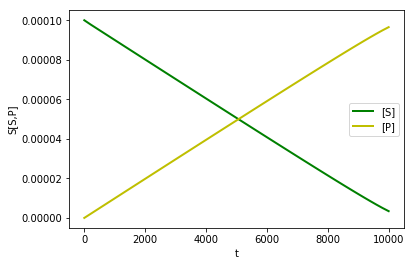

In [7]:
#influence of inital [S]
for S0 in [10**-9,10**-8,10**-7,10**-6,10**-5,10**-4]:
    s0=[10**-7,S0,0,0]
    def f(s,t,k1,k2,k3):
    
        E = s[0]
        S = s[1]
        ES = s[2]
        P = s[3]
        dEdt = k2*ES - k1*E*S +k3*ES
        dSdt = k2*ES - k1*E*S
        dESdt = k1*E*S - k2*ES - k3*ES
        dPdt = k3*ES
        return [dEdt,dSdt,dESdt,dPdt]
    s=odeint(f,s0,t, args=tuple((k1,k2,k3)) )
    plt.plot(t,s[:,0],'r--', linewidth=2.0)
    plt.plot(t,s[:,2],'b-', linewidth=2.0)

    plt.xlabel("t")
    plt.ylabel("S[E,ES]")
    plt.legend(["[E]","[ES]"])
    plt.show()
    
    plt.plot(t,s[:,1],'g-', linewidth=2.0)
    plt.plot(t,s[:,3],'y-', linewidth=2.0)
    plt.xlabel("t")
    plt.ylabel("S[S,P]")
    plt.legend(["[S]","[P]"])
    plt.show()

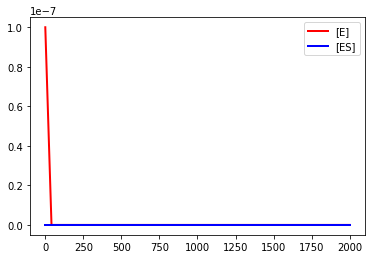

In [8]:
#quasi steady state is one of the rate is zero ES
s0=[10**(-7),10**-5, 0, 0]#[E],[S],[ES],[P]
def f(s,t,k1,k2,k3):
    
    E = s[0]
    S = s[1]
    ES = s[2]
    P = s[3]
    dEdt = k2*ES - k1*E*S +k3*ES
    dSdt = k2*ES - k1*E*S
    dESdt = 0
    dPdt = k3*ES
    return [dEdt,dSdt,dESdt,dPdt]
t = np.linspace(0,2000)
s = odeint(f,s0,t, args=tuple((k1,k2,k3)) )
plt.plot(t,s[:,0],'-r',linewidth=2.0)
plt.plot(t,s[:,2],'-b',linewidth=2)
plt.legend(["[E]","[ES]"])
plt.show()


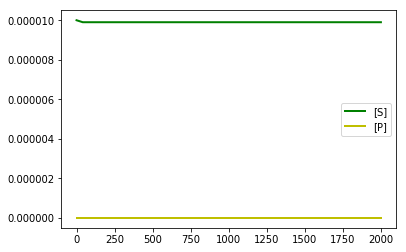

In [9]:
plt.plot(t,s[:,1],'-g',linewidth=2.0)
plt.plot(t,s[:,3],'-y',linewidth=2)
plt.legend(["[S]","[P]"])
plt.show()

In [29]:
#part3: